## Leads Classification

### Objective:
    Identifying the Potential Leads from generated set of Leads. This will help Sales Team focus on communicating with Potential leads, rather than just dialing all the leads. 

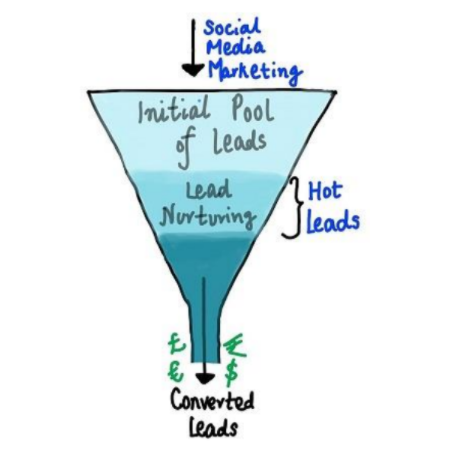

### Data Dictionary

- Prospect ID - A unique ID with which the customer is identified.
- Lead Number - A lead number assigned to each lead procured.
- Lead Origin - The origin identifier with which the customer was identified to be a lead.
- Includes API, Landing Page Submission, etc.
- Lead Source - The source of the lead. Includes Google, Organic Search, Olark Chat, etc.
- Do Not Email -An indicator variable selected by the customer wherein they select whether
or not they want to be emailed about the course or not.
- Do Not Call - An indicator variable selected by the customer wherein they select whether or
not they want to be called about the course or not.
- TotalVisits - The total number of visits made by the customer on the website.
- Total Time Spent on Website - The total time spent by the customer on the website.
- Page Views Per Visit - Average number of pages on the website viewed during the visits.
- Last Activity - Last activity performed by the customer. Includes Email Opened, Olark Chat
Conversation, etc.
- Country - The country of the customer.
- Specialization - The industry domain in which the customer worked before. Includes the
level 'Select Specialization' which means the customer had not selected this option while
filling the form.
- How did you hear about X Education - The source from which the customer heard about X
Education?
- What is your current occupation - Indicates whether the customer is a student, unemployed
or employed?
- What matters most to you in choosing this course - An option selected by the customer
indicating what is their main motto behind doing this course.
- Search - Indicating whether the customer had seen the ad in any of the listed items.
- Magazine
- Newspaper Article
- X Education Forums
- Newspaper
- Digital Advertisement
- Through Recommendations - Indicates whether the customer came in through
recommendations.
- Receive More Updates About Our Courses - Indicates whether the customer chose to
receive more updates about the courses.
- Tags - Tags assigned to customers indicating the current status of the lead.
- Lead Quality - Indicates the quality of lead based on the data and intuition the employee
who has been assigned to the lead.
- Update me on Supply Chain Content - Indicates whether the customer wants updates on
the Supply Chain Content.
- Get updates on DM Content - Indicates whether the customer wants updates on the DM
Content.
- Lead Profile - A lead level assigned to each customer based on their profile.
- City - The city of the customer.
- Asymmetric Activity Index - An index and score assigned to each customer based on their
activity and their profile
- Asymmetric Profile Index
- Asymmetric Activity Score
- Asymmetric Profile Score
- I agree to pay the amount through cheque - Indicates whether the customer has agreed to
pay the amount through cheque or not.
- A free copy of Mastering the Interview - Indicates whether the customer wants a free copy
of 'Mastering the Interview' or not.
- Last Notable Activity - The last notable activity performed by the student.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#Read the Dataset
df = pd.read_csv("./Ivy pro/Python Datasets/Classification Datasets/Leads_data.csv")
df.head()

,Prospect_ID,Lead_Number,Lead_Origin,Lead_Source,Do_Not_Email,Do_Not_Call,Converted,Total_Visits,Total_Time_Spent_on_Website,Page_Views_Per_Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique_Activity_Index,Asymmetrique_Profile_Index,Asymmetrique_Activity_Score,Asymmetrique_Profile_Score,I agree to pay the amount through cheque,A_free_copy_of_Mastering_The_Interview,Last_Notable_Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,Medium,Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,Medium,Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,Medium,High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,Medium,High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,Medium,High,15.0,18.0,No,No,Modified


### Overview of the Dataset

In [3]:
df.shape

(9240, 37)

In [4]:
df.describe(include='all')

,Prospect_ID,Lead_Number,Lead_Origin,Lead_Source,Do_Not_Email,Do_Not_Call,Converted,Total_Visits,Total_Time_Spent_on_Website,Page_Views_Per_Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique_Activity_Index,Asymmetrique_Profile_Index,Asymmetrique_Activity_Score,Asymmetrique_Profile_Score,I agree to pay the amount through cheque,A_free_copy_of_Mastering_The_Interview,Last_Notable_Activity
count,9240,9240.000000,9240,9204,9240,9240,9240.000000,9103.000000,9240.000000,9103.000000,...,9240,6531,7820,5022,5022,5022.000000,5022.000000,9240,9240,9240
unique,9240,NaN,5,21,2,2,NaN,NaN,NaN,NaN,...,1,6,7,3,3,NaN,NaN,1,2,16
top,5f4a0ace-c880-4427-8d7b-66d97202b08d,NaN,Landing Page Submission,Google,No,No,NaN,NaN,NaN,NaN,...,No,Select,Mumbai,Medium,Medium,NaN,NaN,No,No,Modified
freq,1,NaN,4886,2868,8506,9238,NaN,NaN,NaN,NaN,...,9240,4146,3222,3839,2788,NaN,NaN,9240,6352,3407
mean,NaN,617188.435606,NaN,NaN,NaN,NaN,0.385390,3.445238,487.698268,2.362820,...,NaN,NaN,NaN,NaN,NaN,14.306252,16.344883,NaN,NaN,NaN
std,NaN,23405.995698,NaN,NaN,NaN,NaN,0.486714,4.854853,548.021466,2.161418,...,NaN,NaN,NaN,NaN,NaN,1.386694,1.811395,NaN,NaN,NaN
min,NaN,579533.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,7.000000,11.000000,NaN,NaN,NaN
25%,NaN,596484.500000,NaN,NaN,NaN,NaN,0.000000,1.000000,12.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,14.000000,15.000000,NaN,NaN,NaN
50%,NaN,615479.000000,NaN,NaN,NaN,NaN,0.000000,3.000000,248.000000,2.000000,...,NaN,NaN,NaN,NaN,NaN,14.000000,16.000000,NaN,NaN,NaN
75%,NaN,637387.250000,NaN,NaN,NaN,NaN,1.000000,5.000000,936.000000,3.000000,...,NaN,NaN,NaN,NaN,NaN,15.000000,18.000000,NaN,NaN,NaN


In [5]:
df.nunique()

Prospect_ID                                      9240
Lead_Number                                      9240
Lead_Origin                                         5
Lead_Source                                        21
Do_Not_Email                                        2
Do_Not_Call                                         2
Converted                                           2
Total_Visits                                       41
Total_Time_Spent_on_Website                      1731
Page_Views_Per_Visit                              114
Last_Activity                                      17
Country                                            38
Specialization                                     19
How_did_you_hear_about_X_Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [6]:
df.drop(columns=['Prospect_ID','Lead_Number'],inplace=True)

> Both Prospect_ID and Lead_Number are very descriptive, these columns will not help in any model building. So we can remove these two features from our dataset.

In [7]:
df.dtypes

Lead_Origin                                       object
Lead_Source                                       object
Do_Not_Email                                      object
Do_Not_Call                                       object
Converted                                          int64
Total_Visits                                     float64
Total_Time_Spent_on_Website                        int64
Page_Views_Per_Visit                             float64
Last_Activity                                     object
Country                                           object
Specialization                                    object
How_did_you_hear_about_X_Education                object
What is your current occupation                   object
What matters most to you in choosing a course     object
Search                                            object
Magazine                                          object
Newspaper Article                                 object
X Education Forums             

In [8]:
#Missing values 
missing_value_perc = (df.isna().sum()/df.shape[0])*100
print("Missing values in terms of percentage:")
missing_value_perc

Missing values in terms of percentage:


Lead_Origin                                       0.000000
Lead_Source                                       0.389610
Do_Not_Email                                      0.000000
Do_Not_Call                                       0.000000
Converted                                         0.000000
Total_Visits                                      1.482684
Total_Time_Spent_on_Website                       0.000000
Page_Views_Per_Visit                              1.482684
Last_Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How_did_you_hear_about_X_Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.0000

Columns that have highest percent of missing values 


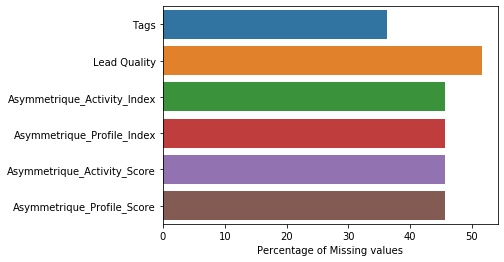

In [9]:
print("Columns that have highest percent of missing values ")
sns.barplot(y = missing_value_perc[missing_value_perc>35].index,x=missing_value_perc[missing_value_perc>35].values)
plt.xlabel("Percentage of Missing values")
plt.show()

In [10]:
df.drop(columns=['Tags','Lead Quality','Asymmetrique_Activity_Index','Asymmetrique_Activity_Score','Asymmetrique_Profile_Index','Asymmetrique_Profile_Score'], inplace = True)

> The above set of features needs to be removed from the Dataset. Applying any kind of imputation on these features will not be of much use. 

0    61.461039
1    38.538961
Name: Converted, dtype: float64


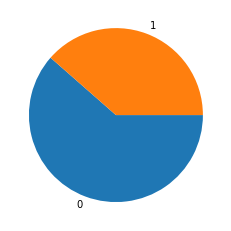

In [11]:
#Lets undetstand the Target variable : Converted
#Target Variable distribution
print(100*(df.Converted.value_counts()/len(df)))

plt.pie(df.Converted.value_counts(),labels=df.Converted.value_counts().index,counterclock=False)
plt.show()

> We see that the data is imbalanced i.e., only 38% of records belong to class = 1 (Coverted Leads) and more than 61% of the records are of class = 0 (Not converted).   
We need to balance this dataset using Upsampling.

### 2. Univariate Analysis

In [12]:
TargetVar = 'Converted'
Continuous_cols = df.columns[df.dtypes != 'object'].to_list()
Categorical_cols = [c for c in df.columns if c not in Continuous_cols]
Continuous_cols.remove('Converted')
print(Continuous_cols)
print()
print(Categorical_cols)

['Total_Visits', 'Total_Time_Spent_on_Website', 'Page_Views_Per_Visit']

['Lead_Origin', 'Lead_Source', 'Do_Not_Email', 'Do_Not_Call', 'Last_Activity', 'Country', 'Specialization', 'How_did_you_hear_about_X_Education', 'What is your current occupation', 'What matters most to you in choosing a course', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'Lead Profile', 'City', 'I agree to pay the amount through cheque', 'A_free_copy_of_Mastering_The_Interview', 'Last_Notable_Activity']


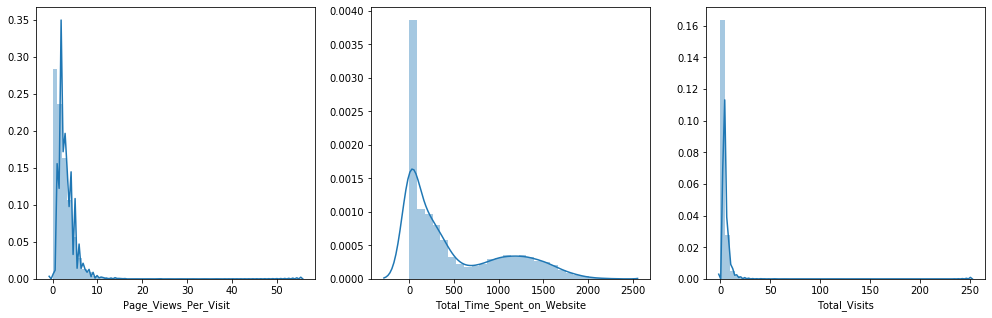

In [13]:
fig, axes = plt.subplots(1,3, figsize = (17,5))

sns.distplot(df.Page_Views_Per_Visit.dropna(),ax=axes[0])
sns.distplot(df.Total_Time_Spent_on_Website.dropna(), ax=axes[1])
sns.distplot(df.Total_Visits.dropna(), ax=axes[2])

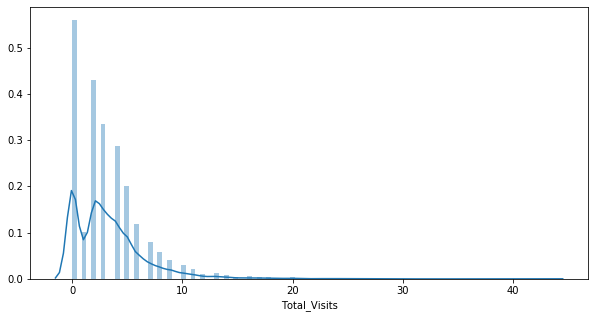

In [14]:
plt.figure(figsize=(10,5))
sns.distplot(df.Total_Visits[df.Total_Visits<50].dropna(), bins=100)
plt.show()

> - We see that majority of people who visits website view 5 - 10 pages.
> - On an average a person visits the site 5-7 times.

In [15]:
#defining the function to plot categorical columns
def plot_categorical_features(features):
    pltCnt = len(features)
    fig, ax = plt.subplots(1,pltCnt, figsize = (15,5))
    pltNum = 0
    for i in features:
        sns.countplot(y = df[i].dropna(), ax=ax[pltNum],order = df[i].value_counts().index)
        plt.tight_layout()
        pltNum += 1
        

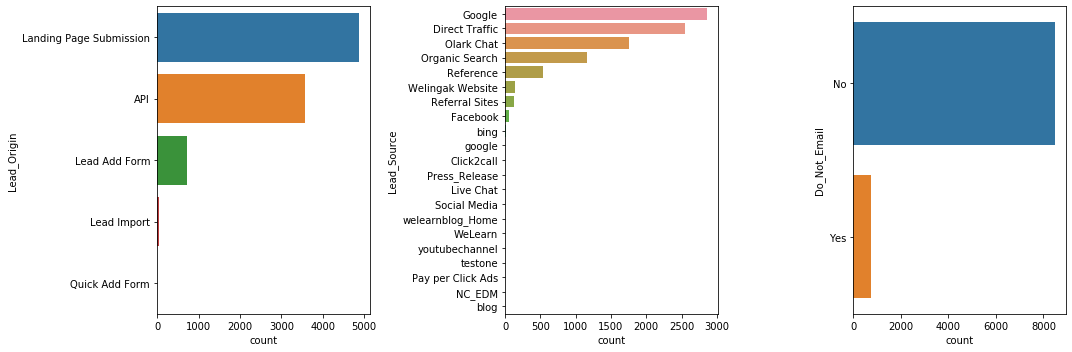

In [16]:
plot_categorical_features(Categorical_cols[:3])

> - Most of the leads origin are from Landing Page submission. And Quick Add Form has very less number of Lead_Origin
> - Most of the user found out about the course by searching on Google
> - Its seen that lot of leads don't liked to be Emails sent about course

ToDo: in Lead_Source replace google with Google, to remove data duplicacy

In [17]:
df.Lead_Source.replace({'google':'Google'},inplace = True)

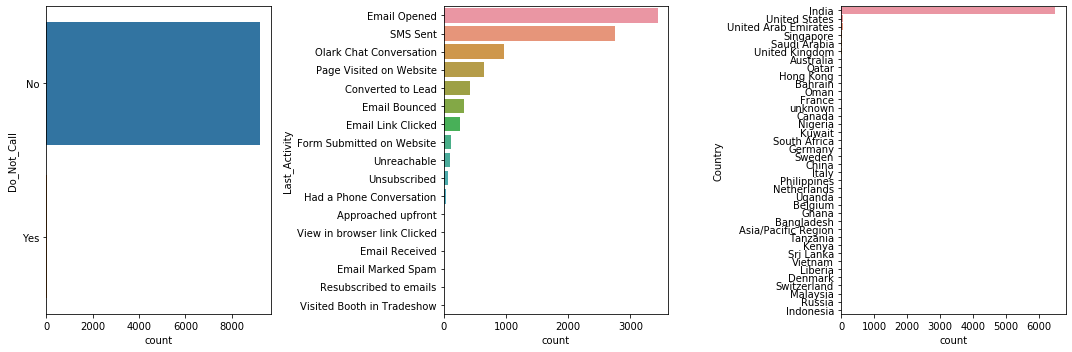

In [18]:
plot_categorical_features(Categorical_cols[3:6])

In [19]:
#lets see what percent of leads are from India
print("Leads country perc:")
((df.Country.value_counts()/len(df))*100) [:5]
# More than 70% of the leads are from India

Leads country perc:


India                   70.259740
United States            0.746753
United Arab Emirates     0.573593
Singapore                0.259740
Saudi Arabia             0.227273
Name: Country, dtype: float64

> - Leads don't liked to be called either. So its kind of clear that Call and Emails are not the way to reach leads. From the next graph we see that Chat conversations are high in number for Last_Activity.
> - Majority of the leads are from India and few from US and UAE

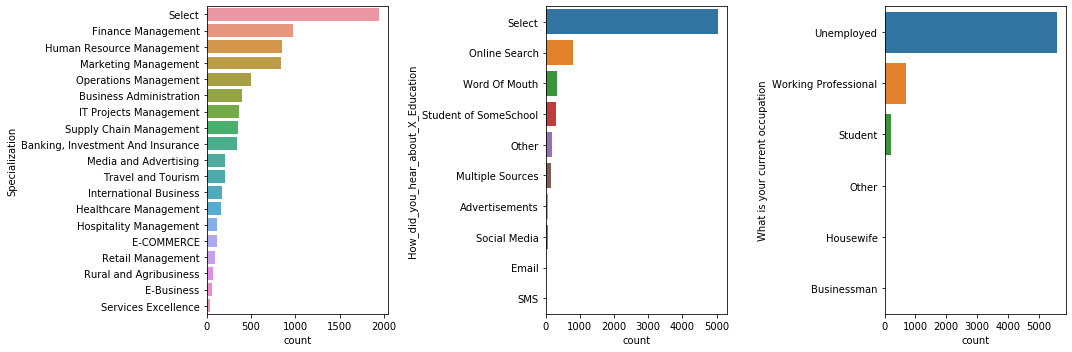

In [20]:
plot_categorical_features(Categorical_cols[6:9])

>- Select in Specialization indicates who refused to answer the question. So its evident that people from Finance, Human Resource, Marketing and Business looked up for online Courses.
>- Many people found the courses through Online search and Word of Mouth.
>- Unemployed are the ones looking for the courses, may be to enhance their skills and get employed.

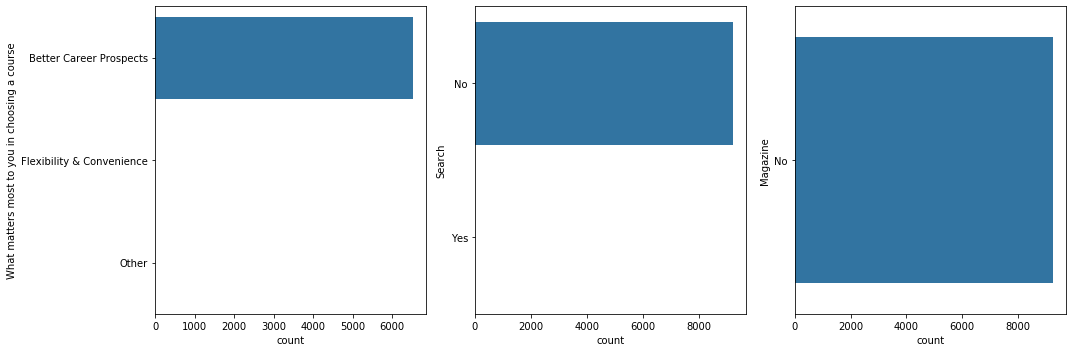

In [21]:
plot_categorical_features(Categorical_cols[9:12])

> - More than 99% of the are looking for Better Career Prospects from these courses. Since theres no diversity in this column, we can say everyone whose looking for courses is looking for Better Career Prospects. so we remove this feature as well. 

>- Nobody found about the X Education Institute through magazine. So we can delete this feature, as all the values are constants.

ToDo: Remove 
- 'What matters most to you in choosing this course',
- 'Search' 
- 'Magazine'

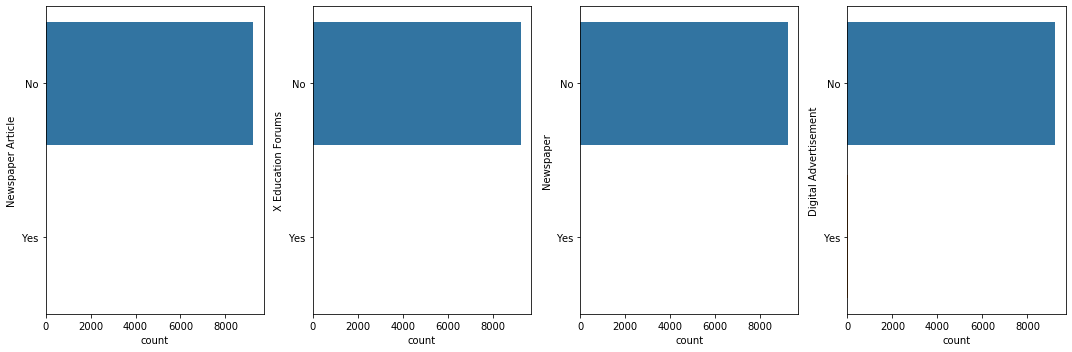

In [22]:
plot_categorical_features(Categorical_cols[12:16])

> The 'Value' for the above feature is mostly 'No'.May be the the person refused to Answer this question. No diversity, so the above features can be deleted as well.

ToDo: Remove
    - Newspaper Article
    - X Education Forums
    - Newspaper
    - Digital Advertisement

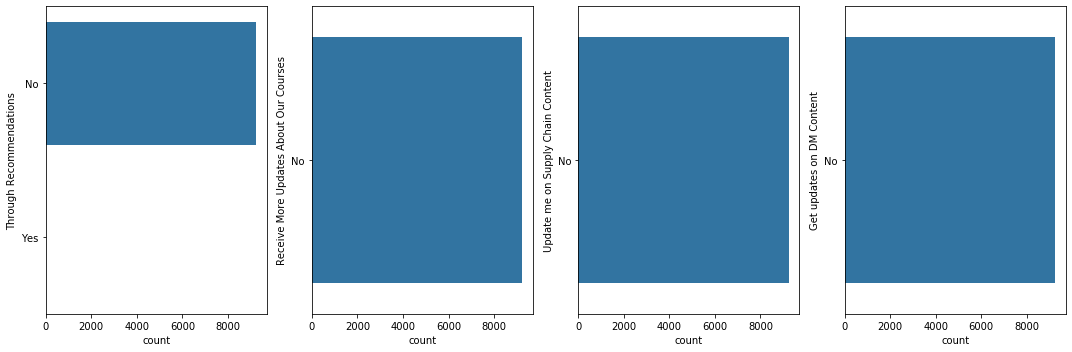

In [23]:
plot_categorical_features(Categorical_cols[16:20])

> Constant value for all the features. Remove all the above features.

ToDo: Remove
    - Through Recommendations 
    - Receive More Updates About Our Courses
    - Update me on Supply Chain Content
    - Get updates on DM Content

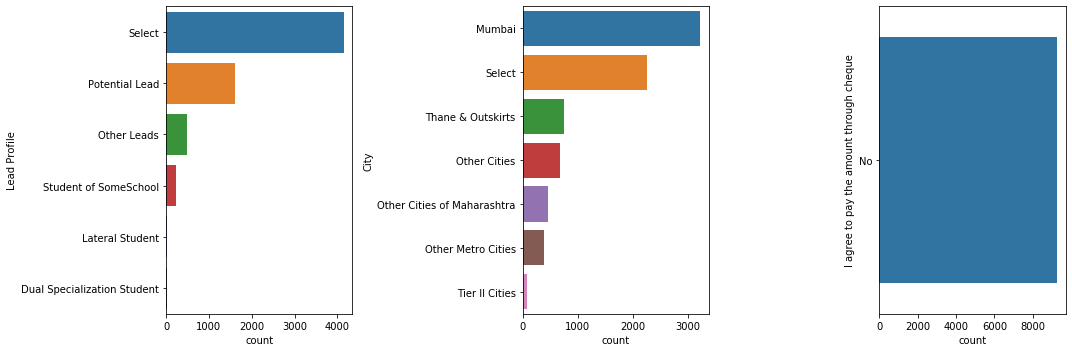

In [24]:
plot_categorical_features(Categorical_cols[20:23])

> - Most of the leads are from state of Maharastra.
>- Nobody agreed to pay by cheque. 

ToDo: Remove
    - I agree to pay the amount through cheque

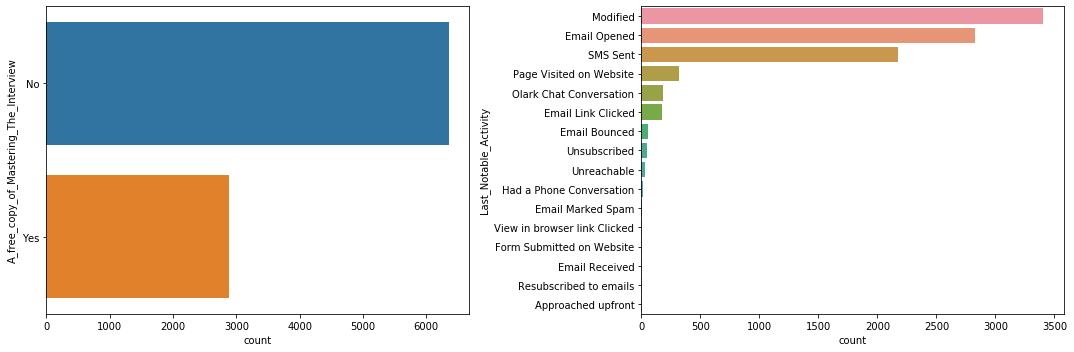

In [25]:
plot_categorical_features(Categorical_cols[23:26])

### Deleting the unwanted features

    - What matters most to you in choosing this course
    - Search
    - Magazine
    - Newspaper Article
    - X Education Forums
    - Newspaper
    - Digital Advertisement
    - Through Recommendations 
    - Receive More Updates About Our Courses
    - Update me on Supply Chain Content
    - Get updates on DM Content
    - I agree to pay the amount through cheque
    - Do_Not_Call

In [26]:
df.drop(axis= 1,columns=['Do_Not_Call','What matters most to you in choosing a course','Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque'], inplace = True)

In [27]:
df = df.replace({'Select':np.NaN})

In [28]:
df.head()

,Lead_Origin,Lead_Source,Do_Not_Email,Converted,Total_Visits,Total_Time_Spent_on_Website,Page_Views_Per_Visit,Last_Activity,Country,Specialization,How_did_you_hear_about_X_Education,What is your current occupation,Lead Profile,City,A_free_copy_of_Mastering_The_Interview,Last_Notable_Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,NaN,Unemployed,NaN,NaN,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,India,NaN,NaN,Unemployed,NaN,NaN,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,NaN,Student,Potential Lead,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,NaN,Mumbai,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Other,Unemployed,NaN,Mumbai,No,Modified


In [29]:
df.isna().sum()/len(df)

Lead_Origin                               0.000000
Lead_Source                               0.003896
Do_Not_Email                              0.000000
Converted                                 0.000000
Total_Visits                              0.014827
Total_Time_Spent_on_Website               0.000000
Page_Views_Per_Visit                      0.014827
Last_Activity                             0.011147
Country                                   0.266342
Specialization                            0.365801
How_did_you_hear_about_X_Education        0.784632
What is your current occupation           0.291126
Lead Profile                              0.741883
City                                      0.397078
A_free_copy_of_Mastering_The_Interview    0.000000
Last_Notable_Activity                     0.000000
dtype: float64

> We see that feature "How_did_you_hear_about_X_Education" and "Lead Profile" has more than 70% of missing values. Any kind of imputation on these columns will lead to Noisy data. So I will be deleting these features. 

In [30]:
df.drop(columns=["How_did_you_hear_about_X_Education","Lead Profile"], inplace = True)

In [31]:
df.dtypes

Lead_Origin                                object
Lead_Source                                object
Do_Not_Email                               object
Converted                                   int64
Total_Visits                              float64
Total_Time_Spent_on_Website                 int64
Page_Views_Per_Visit                      float64
Last_Activity                              object
Country                                    object
Specialization                             object
What is your current occupation            object
City                                       object
A_free_copy_of_Mastering_The_Interview     object
Last_Notable_Activity                      object
dtype: object

In [32]:
df.Converted = df.Converted.astype('object')

### Outlier Treatment

In [33]:
TargetVar = 'Converted'
Continuous_cols = df.columns[df.dtypes != 'object'].to_list()
Categorical_cols = [c for c in df.columns if c not in Continuous_cols]
Categorical_cols.remove('Converted')
print(Continuous_cols)
print()
print(Categorical_cols)

['Total_Visits', 'Total_Time_Spent_on_Website', 'Page_Views_Per_Visit']

['Lead_Origin', 'Lead_Source', 'Do_Not_Email', 'Last_Activity', 'Country', 'Specialization', 'What is your current occupation', 'City', 'A_free_copy_of_Mastering_The_Interview', 'Last_Notable_Activity']


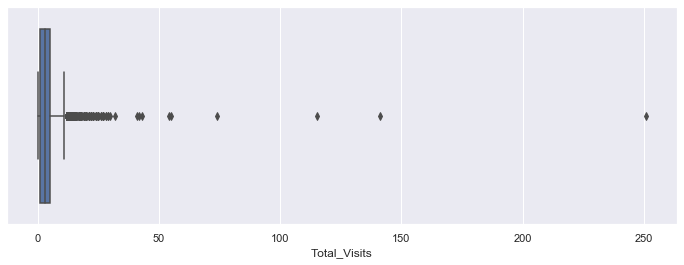

In [34]:
sns.set(rc={'figure.figsize':(12,4)})
sns.boxplot(df.Total_Visits)

In [35]:
df.Total_Visits[df.Total_Visits<50].sort_values(ascending = False)[:5]

1160    43.0
8230    42.0
5530    41.0
6580    32.0
1824    30.0
Name: Total_Visits, dtype: float64

In [36]:
df.Total_Visits[df.Total_Visits>50] = 43

D:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


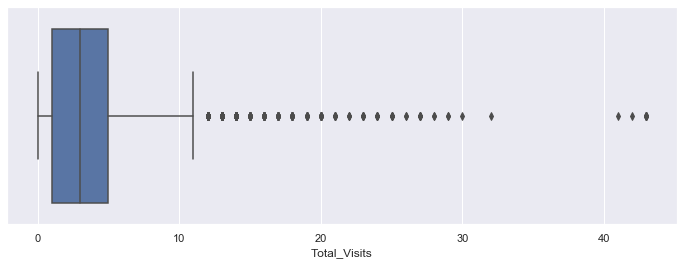

In [37]:
sns.set(rc={'figure.figsize':(12,4)})
sns.boxplot(df.Total_Visits)

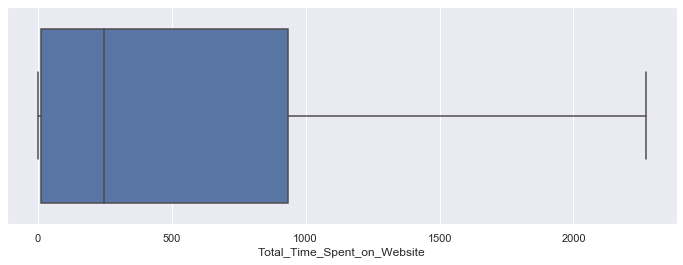

In [38]:
sns.set(rc={'figure.figsize':(12,4)})
sns.boxplot(df.Total_Time_Spent_on_Website)

> No outlier found in Total_Time_Spent_on_Website feature.

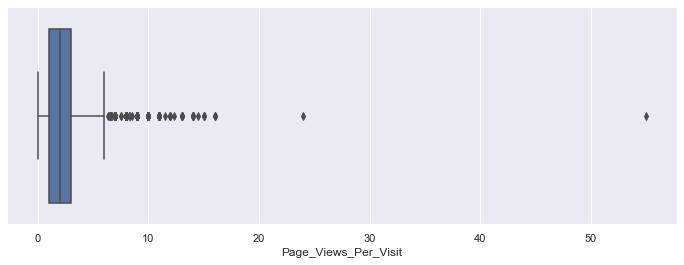

In [39]:
sns.set(rc={'figure.figsize':(12,4)})
sns.boxplot(df.Page_Views_Per_Visit)

In [40]:
df.Page_Views_Per_Visit[df.Page_Views_Per_Visit<20].sort_values(ascending = False)[:5]

125     16.0
5164    16.0
5495    16.0
387     15.0
4518    15.0
Name: Page_Views_Per_Visit, dtype: float64

In [41]:
df.Page_Views_Per_Visit[df.Page_Views_Per_Visit>20] = 16

D:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


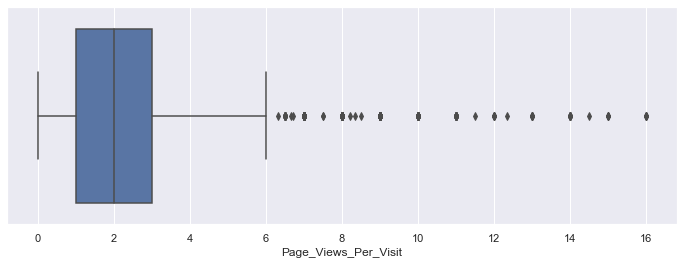

In [42]:
sns.set(rc={'figure.figsize':(12,4)})
sns.boxplot(df.Page_Views_Per_Visit)

### Missing Value Treatment

In [43]:
df.isna().sum()/len(df)

Lead_Origin                               0.000000
Lead_Source                               0.003896
Do_Not_Email                              0.000000
Converted                                 0.000000
Total_Visits                              0.014827
Total_Time_Spent_on_Website               0.000000
Page_Views_Per_Visit                      0.014827
Last_Activity                             0.011147
Country                                   0.266342
Specialization                            0.365801
What is your current occupation           0.291126
City                                      0.397078
A_free_copy_of_Mastering_The_Interview    0.000000
Last_Notable_Activity                     0.000000
dtype: float64

We have used two techinques here.
- Features with less number of missing values : Median/Mode imputation
- Features with more number of missing values : Captured missing values using new columns & mode imputation 

In [44]:
df.Lead_Source.fillna(df.Lead_Source.mode()[0], inplace = True)
df.Total_Visits.fillna(df.Total_Visits.median(), inplace =True)
df.Page_Views_Per_Visit.fillna(df.Page_Views_Per_Visit.median(),inplace = True)
df.Last_Activity.fillna(df.Last_Activity.mode()[0], inplace = True)
df.Country.fillna(df.Country.mode()[0],inplace = True)

In [45]:
#For features like Specialization,What is your current occupation, city - we'll capture absence of value by creating some new features
df['Specialization_NaN'] = np.where(df.Specialization.isnull(),1,0)
df['Occupation_NaN'] = np.where(df['What is your current occupation'].isnull(),1,0)
df['City_NaN'] = np.where(df.City.isnull(),1,0)

In [46]:
#Now Replacing NaN for above 3 columns with mode value
df.Specialization.fillna(df.Specialization.mode()[0],inplace=True)
df['What is your current occupation'].fillna(df['What is your current occupation'].mode()[0],inplace = True)
df.City.fillna(df.City.mode()[0],inplace = True)

In [47]:
df.isna().sum()/len(df)

Lead_Origin                               0.0
Lead_Source                               0.0
Do_Not_Email                              0.0
Converted                                 0.0
Total_Visits                              0.0
Total_Time_Spent_on_Website               0.0
Page_Views_Per_Visit                      0.0
Last_Activity                             0.0
Country                                   0.0
Specialization                            0.0
What is your current occupation           0.0
City                                      0.0
A_free_copy_of_Mastering_The_Interview    0.0
Last_Notable_Activity                     0.0
Specialization_NaN                        0.0
Occupation_NaN                            0.0
City_NaN                                  0.0
dtype: float64

In [48]:
df.head()

,Lead_Origin,Lead_Source,Do_Not_Email,Converted,Total_Visits,Total_Time_Spent_on_Website,Page_Views_Per_Visit,Last_Activity,Country,Specialization,What is your current occupation,City,A_free_copy_of_Mastering_The_Interview,Last_Notable_Activity,Specialization_NaN,Occupation_NaN,City_NaN
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,India,Finance Management,Unemployed,Mumbai,No,Modified,1,0,1
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,India,Finance Management,Unemployed,Mumbai,No,Email Opened,1,0,1
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Mumbai,Yes,Email Opened,0,0,0
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Mumbai,No,Modified,0,0,0
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,India,Finance Management,Unemployed,Mumbai,No,Modified,1,0,0


> No Missing values or Outliers in the Dataset. Now we perform Bivariate Analysis.

### Bivariate Analysis

#### Continuous Columns vs Converted - Box Plots


for i  in Continuous_cols:
    counter = 1
    fig, ax = plt.subplots(1,3, figsize = (15,5)) 
    sns.boxplot(y = df[i],  x = df.Converted, ax=ax[counter])
    counter += 1
#Whats wrong with the code? Why is it creating unwanted columns

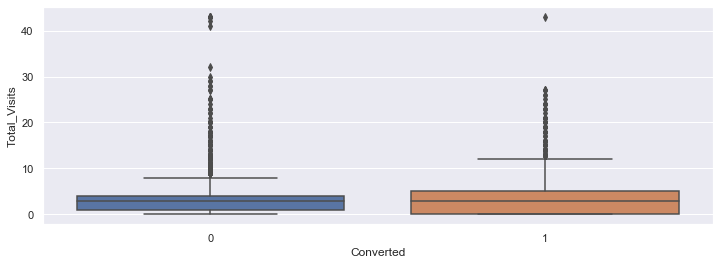

In [49]:
sns.boxplot(x = df.Converted, y= df.Total_Visits)

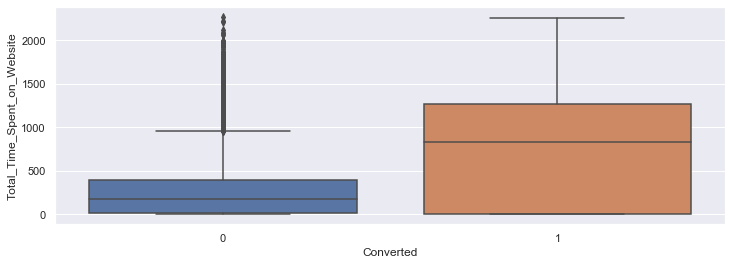

In [50]:
sns.boxplot(x = df.Converted, y= df.Total_Time_Spent_on_Website)

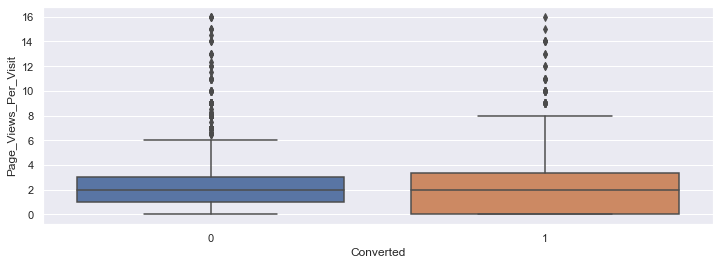

In [51]:
sns.boxplot(x = df.Converted, y = df.Page_Views_Per_Visit)

> One notable difference is that, those leads who got converted spent more time on website in general. This feature could be one of the indications of interest in program.  

### Categorical Columns vs Converted - Grouped Bar Charts

In [52]:
def plot_grouped_bar_charts(Target, ListOfFeat):
    cols = len(ListOfFeat)
    fig,ax = plt.subplots(1,cols, figsize = (15,5))
    
    for count,feature in zip(range(0,cols),ListOfFeat):
        CrossTabResult = pd.crosstab(columns = df[Target],index=df[feature])
        CrossTabResult.plot.bar(ax = ax[count], title = feature+" vs "+Target)
        plt.tight_layout()

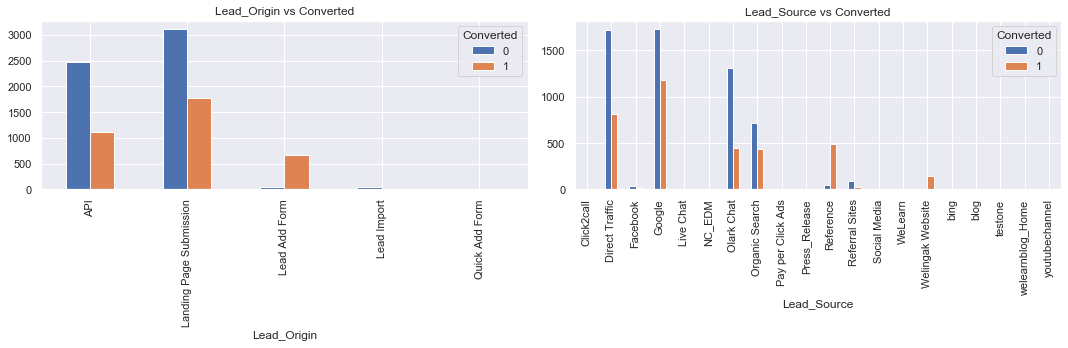

In [53]:
plot_grouped_bar_charts(TargetVar,Categorical_cols[0:2])

> - Leads those who's origin is 'Lead Add Form' got converted easily.
> - 'Reference' is the most effective method, as most of them got converted. 

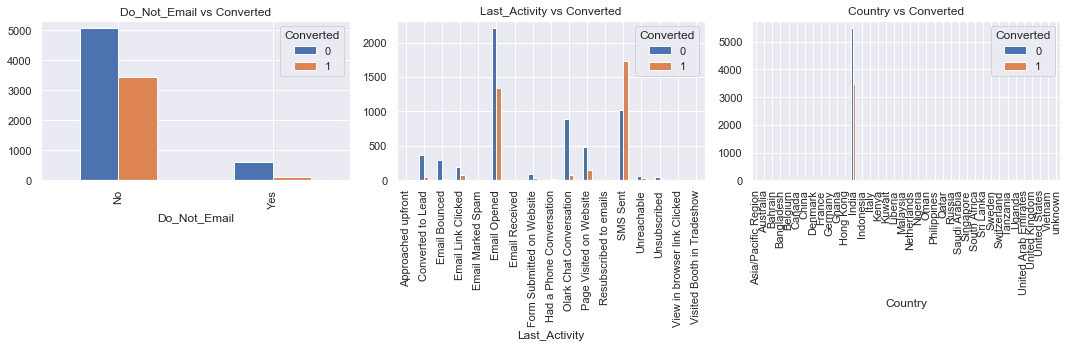

In [54]:
plot_grouped_bar_charts(TargetVar,Categorical_cols[2:5])

> - Those who opted for 'Don't Email' are less likely to get converted. It indicated the interest in the program.
> - Those who opened Email to check about program and received SMS abt the program got converted more in number.
> - As majority of the leads are from India, the conversions are also from India

ToDo:
    - Whats the percentage of Conversions from other countries.?

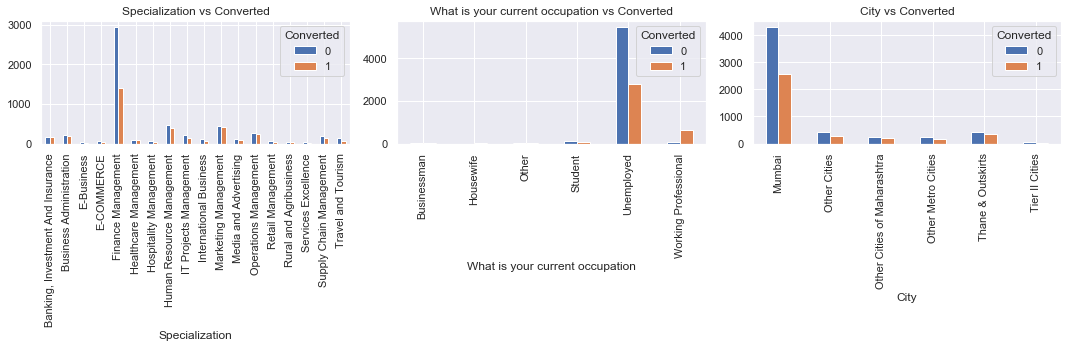

In [55]:
plot_grouped_bar_charts(TargetVar,Categorical_cols[5:8])

> - People from Finance Management and HR Management, should be the primary target and Marketing Mgmt is also one of the potential leads.
> - Unemployed and Working professional should be given more importance.

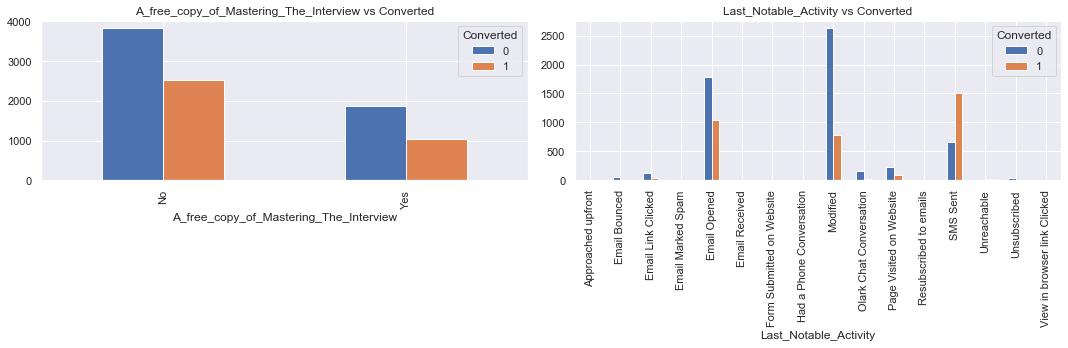

In [56]:
plot_grouped_bar_charts(TargetVar,Categorical_cols[8:11])

In [57]:
df[(df.Country != 'India') & (df.Converted == '1')]

,Lead_Origin,Lead_Source,Do_Not_Email,Converted,Total_Visits,Total_Time_Spent_on_Website,Page_Views_Per_Visit,Last_Activity,Country,Specialization,What is your current occupation,City,A_free_copy_of_Mastering_The_Interview,Last_Notable_Activity,Specialization_NaN,Occupation_NaN,City_NaN


In [58]:
df.drop(columns=['Country'], inplace = True)

> We saw that there were no conversions from any other Countries. And combined leads from other countries was less than 30%.
So we deleted Country feature because of missing deversity.

### Relationship Analysis

#### Continuous Vs Categorical - ANOVA Test
Analysis of variance(ANOVA) is performed to check if there is any relationship between the given continuous and categorical variable

- Assumption(H0): There is NO relation between the given variables (i.e. The average(mean) values of the numeric Predictor variable is same for all the groups in the categorical Target variable)
- ANOVA Test result: Probability of H0 being true

In [59]:
from scipy.stats import f_oneway

def function_anova(Target,Predictors):
    
    for predictor in Predictors:
        GroupedData = df.groupby([Target])[predictor].apply(list) #Creates 2 different lists of Predictors when Target =1 and Taret=0
        AnovaResult = f_oneway(*GroupedData)
        
        if AnovaResult[1]< 0.05:
            print("{0} \t\t {1} \t {2}".format(predictor,AnovaResult[1], 'Important'))
        else:
            print("{0} \t\t {1} \t {2}".format(predictor,AnovaResult[1], 'Not Important'))

In [60]:
function_anova(TargetVar,Continuous_cols)

Total_Visits 		 0.0004982904545949884 	 Important
Total_Time_Spent_on_Website 		 6.061532215255665e-285 	 Important
Page_Views_Per_Visit 		 0.6890650554714737 	 Not Important


In [61]:
final_predictors = ['Total_Visits','Total_Time_Spent_on_Website']

#### Categorical Vs Categorical - Chi-Square test

Chi-Square test is conducted to check the correlation between two categorical variables

- Assumption(H0): The two columns are NOT related to each other
- Result of Chi-Sq Test: The Probability of H0 being True

In [62]:
from scipy.stats import chi2_contingency

def function_chisq(Target,Predictors):
    for predictor in Predictors:
        CrossTabResult = pd.crosstab(index=df[Target], columns=df[predictor])
        ChiSqResult = chi2_contingency(CrossTabResult)
        
        if ChiSqResult[1]<0.05:
            print("{0} \t\t {1} \t {2}".format(predictor,ChiSqResult[1], 'Important'))
        else:
            print("{0} \t\t {1} \t {2}".format(predictor,ChiSqResult[1], 'Not Important'))
            

In [63]:
Categorical_cols.remove('Country')
function_chisq(TargetVar, Categorical_cols)

Lead_Origin 		 1.9383179047786695e-211 	 Important
Lead_Source 		 2.2610765566905536e-212 	 Important
Do_Not_Email 		 1.3384599721779416e-38 	 Important
Last_Activity 		 2.7582665965029465e-296 	 Important
Specialization 		 2.6752289738646312e-30 	 Important
What is your current occupation 		 2.0048634168048997e-200 	 Important
City 		 8.784900567282934e-05 	 Important
A_free_copy_of_Mastering_The_Interview 		 0.00014201097210552092 	 Important
Last_Notable_Activity 		 4.239808596196917e-279 	 Important


> We see that all the Categorical Columns are Important and having p-values < 0.05. We'll keep all these features for our future analysis.

In [64]:
final_predictors.extend(Categorical_cols)
final_predictors

['Total_Visits',
 'Total_Time_Spent_on_Website',
 'Lead_Origin',
 'Lead_Source',
 'Do_Not_Email',
 'Last_Activity',
 'Specialization',
 'What is your current occupation',
 'City',
 'A_free_copy_of_Mastering_The_Interview',
 'Last_Notable_Activity']

In [65]:
final_predictors.extend(['Specialization_NaN', 'Occupation_NaN','City_NaN','Converted'])
final_predictors

['Total_Visits',
 'Total_Time_Spent_on_Website',
 'Lead_Origin',
 'Lead_Source',
 'Do_Not_Email',
 'Last_Activity',
 'Specialization',
 'What is your current occupation',
 'City',
 'A_free_copy_of_Mastering_The_Interview',
 'Last_Notable_Activity',
 'Specialization_NaN',
 'Occupation_NaN',
 'City_NaN',
 'Converted']

> Last 3 features are important as they indicate the missing values of certain columns.

In [66]:
DataForML = df[final_predictors].copy()
DataForML.head()

,Total_Visits,Total_Time_Spent_on_Website,Lead_Origin,Lead_Source,Do_Not_Email,Last_Activity,Specialization,What is your current occupation,City,A_free_copy_of_Mastering_The_Interview,Last_Notable_Activity,Specialization_NaN,Occupation_NaN,City_NaN,Converted
0,0.0,0,API,Olark Chat,No,Page Visited on Website,Finance Management,Unemployed,Mumbai,No,Modified,1,0,1,0
1,5.0,674,API,Organic Search,No,Email Opened,Finance Management,Unemployed,Mumbai,No,Email Opened,1,0,1,0
2,2.0,1532,Landing Page Submission,Direct Traffic,No,Email Opened,Business Administration,Student,Mumbai,Yes,Email Opened,0,0,0,1
3,1.0,305,Landing Page Submission,Direct Traffic,No,Unreachable,Media and Advertising,Unemployed,Mumbai,No,Modified,0,0,0,0
4,2.0,1428,Landing Page Submission,Google,No,Converted to Lead,Finance Management,Unemployed,Mumbai,No,Modified,1,0,0,1


In [67]:
DataForML.nunique()

Total_Visits                                35
Total_Time_Spent_on_Website               1731
Lead_Origin                                  5
Lead_Source                                 20
Do_Not_Email                                 2
Last_Activity                               17
Specialization                              18
What is your current occupation              6
City                                         6
A_free_copy_of_Mastering_The_Interview       2
Last_Notable_Activity                       16
Specialization_NaN                           2
Occupation_NaN                               2
City_NaN                                     2
Converted                                    2
dtype: int64

### Handling Categorical features

- We will be applying One Hot Encoding for features with less number of categorical values 

(Lead_Origin, Do_Not_Email, What is your current occupation, city, A_free_copy_of_Mastering_The_Interview)

- For other columns we'll use Count/Frequency encoding 

(Lead_Source,Last_Activity,Specialization,Last_Notable_Activity)

In [68]:
#Let's Rename some of the columns

DataForML.rename(columns = {'What is your current occupation': 'Current_Occupation', 'A_free_copy_of_Mastering_The_Interview': 'Need_Interview_Mastercopy'}, inplace= True)

DataForML.head()

,Total_Visits,Total_Time_Spent_on_Website,Lead_Origin,Lead_Source,Do_Not_Email,Last_Activity,Specialization,Current_Occupation,City,Need_Interview_Mastercopy,Last_Notable_Activity,Specialization_NaN,Occupation_NaN,City_NaN,Converted
0,0.0,0,API,Olark Chat,No,Page Visited on Website,Finance Management,Unemployed,Mumbai,No,Modified,1,0,1,0
1,5.0,674,API,Organic Search,No,Email Opened,Finance Management,Unemployed,Mumbai,No,Email Opened,1,0,1,0
2,2.0,1532,Landing Page Submission,Direct Traffic,No,Email Opened,Business Administration,Student,Mumbai,Yes,Email Opened,0,0,0,1
3,1.0,305,Landing Page Submission,Direct Traffic,No,Unreachable,Media and Advertising,Unemployed,Mumbai,No,Modified,0,0,0,0
4,2.0,1428,Landing Page Submission,Google,No,Converted to Lead,Finance Management,Unemployed,Mumbai,No,Modified,1,0,0,1


In [69]:
#Let's apply OHE 
DataForML = pd.get_dummies(data = DataForML, columns=['Lead_Origin', 'Do_Not_Email', 'Current_Occupation', 'City', 'Need_Interview_Mastercopy'], drop_first=True)

DataForML.head()

,Total_Visits,Total_Time_Spent_on_Website,Lead_Source,Last_Activity,Specialization,Last_Notable_Activity,Specialization_NaN,Occupation_NaN,City_NaN,Converted,...,Current_Occupation_Other,Current_Occupation_Student,Current_Occupation_Unemployed,Current_Occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Need_Interview_Mastercopy_Yes
0,0.0,0,Olark Chat,Page Visited on Website,Finance Management,Modified,1,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,5.0,674,Organic Search,Email Opened,Finance Management,Email Opened,1,0,1,0,...,0,0,1,0,0,0,0,0,0,0
2,2.0,1532,Direct Traffic,Email Opened,Business Administration,Email Opened,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
3,1.0,305,Direct Traffic,Unreachable,Media and Advertising,Modified,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,2.0,1428,Google,Converted to Lead,Finance Management,Modified,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [70]:
DataForML.columns

Index(['Total_Visits', 'Total_Time_Spent_on_Website', 'Lead_Source',
       'Last_Activity', 'Specialization', 'Last_Notable_Activity',
       'Specialization_NaN', 'Occupation_NaN', 'City_NaN', 'Converted',
       'Lead_Origin_Landing Page Submission', 'Lead_Origin_Lead Add Form',
       'Lead_Origin_Lead Import', 'Lead_Origin_Quick Add Form',
       'Do_Not_Email_Yes', 'Current_Occupation_Housewife',
       'Current_Occupation_Other', 'Current_Occupation_Student',
       'Current_Occupation_Unemployed',
       'Current_Occupation_Working Professional', 'City_Other Cities',
       'City_Other Cities of Maharashtra', 'City_Other Metro Cities',
       'City_Thane & Outskirts', 'City_Tier II Cities',
       'Need_Interview_Mastercopy_Yes'],
      dtype='object')

In [71]:
#Let's apply Count/Frequency encoding techniques
for col in ['Lead_Source','Last_Activity','Specialization','Last_Notable_Activity']:
    z = df[col].value_counts().to_dict()
    DataForML[col + "_FE"] = df[col].map(z)
    DataForML.drop(columns=col,axis = 1, inplace = True)

In [72]:
DataForML.head()

,Total_Visits,Total_Time_Spent_on_Website,Specialization_NaN,Occupation_NaN,City_NaN,Converted,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Origin_Lead Import,Lead_Origin_Quick Add Form,...,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Need_Interview_Mastercopy_Yes,Lead_Source_FE,Last_Activity_FE,Specialization_FE,Last_Notable_Activity_FE
0,0.0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1755,640,4356,3407
1,5.0,674,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1154,3540,4356,2827
2,2.0,1532,0,0,0,1,1,0,0,0,...,0,0,0,0,0,1,2543,3540,403,2827
3,1.0,305,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,2543,93,203,3407
4,2.0,1428,1,0,0,1,1,0,0,0,...,0,0,0,0,0,0,2909,428,4356,3407


In [73]:
DataForML.columns

Index(['Total_Visits', 'Total_Time_Spent_on_Website', 'Specialization_NaN',
       'Occupation_NaN', 'City_NaN', 'Converted',
       'Lead_Origin_Landing Page Submission', 'Lead_Origin_Lead Add Form',
       'Lead_Origin_Lead Import', 'Lead_Origin_Quick Add Form',
       'Do_Not_Email_Yes', 'Current_Occupation_Housewife',
       'Current_Occupation_Other', 'Current_Occupation_Student',
       'Current_Occupation_Unemployed',
       'Current_Occupation_Working Professional', 'City_Other Cities',
       'City_Other Cities of Maharashtra', 'City_Other Metro Cities',
       'City_Thane & Outskirts', 'City_Tier II Cities',
       'Need_Interview_Mastercopy_Yes', 'Lead_Source_FE', 'Last_Activity_FE',
       'Specialization_FE', 'Last_Notable_Activity_FE'],
      dtype='object')

In [74]:
DataForML.Converted = DataForML.Converted.astype('int')

In [75]:
#Lets split the DataForMl into Train and Test set
from sklearn.model_selection import train_test_split
X = DataForML.drop(columns='Converted',axis =1)
y = DataForML.Converted 

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3, random_state=1)

#Doubt: What is stratify used for? How does it handle imbalanced dataset. 
#Do we still set this to some value if upsampling/downsampling is done?

In [76]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(6468, 25) (6468,)
(2772, 25) (2772,)


In [77]:
X_train.head()

,Total_Visits,Total_Time_Spent_on_Website,Specialization_NaN,Occupation_NaN,City_NaN,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Origin_Lead Import,Lead_Origin_Quick Add Form,Do_Not_Email_Yes,...,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Need_Interview_Mastercopy_Yes,Lead_Source_FE,Last_Activity_FE,Specialization_FE,Last_Notable_Activity_FE
5261,10.0,360,0,0,0,1,0,0,0,0,...,0,0,1,0,0,1,2543,3540,4356,2827
2901,0.0,0,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,1755,973,4356,3407
6969,2.0,7,0,0,0,1,0,0,0,0,...,0,0,1,0,0,1,2543,3540,4356,2827
1256,4.0,76,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,2909,3540,403,2827
1554,2.0,96,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,2909,326,838,3407


In [78]:
y_train.head()

5261    0
2901    0
6969    0
1256    0
1554    0
Name: Converted, dtype: int32

### Machine Learning

### 1. Decision Tree

In [79]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score,confusion_matrix,classification_report

DTClf = DecisionTreeClassifier()

tree_params = {
                'criterion' : ['gini','entropy'],
                'max_depth' :  list(np.arange(2,15,1))
}

modelDT = GridSearchCV(DTClf,param_grid = tree_params, verbose = 3, cv=5 )

DTree = modelDT.fit(X_train,y_train)



Fitting 5 folds for each of 26 candidates, totalling 130 fits
[CV 1/5] END ....................criterion=gini, max_depth=2; total time=   0.0s
[CV 2/5] END ....................criterion=gini, max_depth=2; total time=   0.0s
[CV 3/5] END ....................criterion=gini, max_depth=2; total time=   0.0s
[CV 4/5] END ....................criterion=gini, max_depth=2; total time=   0.0s
[CV 5/5] END ....................criterion=gini, max_depth=2; total time=   0.0s
[CV 1/5] END ....................criterion=gini, max_depth=3; total time=   0.0s
[CV 2/5] END ....................criterion=gini, max_depth=3; total time=   0.0s
[CV 3/5] END ....................criterion=gini, max_depth=3; total time=   0.0s
[CV 4/5] END ....................criterion=gini, max_depth=3; total time=   0.0s
[CV 5/5] END ....................criterion=gini, max_depth=3; total time=   0.0s
[CV 1/5] END ....................criterion=gini, max_depth=4; total time=   0.0s
[CV 2/5] END ....................criterion=gini

[CV 5/5] END .................criterion=entropy, max_depth=9; total time=   0.0s
[CV 1/5] END ................criterion=entropy, max_depth=10; total time=   0.0s
[CV 2/5] END ................criterion=entropy, max_depth=10; total time=   0.0s
[CV 3/5] END ................criterion=entropy, max_depth=10; total time=   0.0s
[CV 4/5] END ................criterion=entropy, max_depth=10; total time=   0.0s
[CV 5/5] END ................criterion=entropy, max_depth=10; total time=   0.0s
[CV 1/5] END ................criterion=entropy, max_depth=11; total time=   0.0s
[CV 2/5] END ................criterion=entropy, max_depth=11; total time=   0.0s
[CV 3/5] END ................criterion=entropy, max_depth=11; total time=   0.0s
[CV 4/5] END ................criterion=entropy, max_depth=11; total time=   0.0s
[CV 5/5] END ................criterion=entropy, max_depth=11; total time=   0.0s
[CV 1/5] END ................criterion=entropy, max_depth=12; total time=   0.0s
[CV 2/5] END ...............

In [80]:
modelDT.best_params_

{'criterion': 'gini', 'max_depth': 7}

In [81]:
y_pred = modelDT.predict(X_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print("F1 score of the model:", round(f1_score(y_test,y_pred, average = 'weighted'),2))

[[1492  185]
 [ 304  791]]
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1677
           1       0.81      0.72      0.76      1095

    accuracy                           0.82      2772
   macro avg       0.82      0.81      0.81      2772
weighted avg       0.82      0.82      0.82      2772

F1 score of the model: 0.82


In [82]:
important_feature =pd.Series(modelDT.best_estimator_.feature_importances_, X_train.columns)

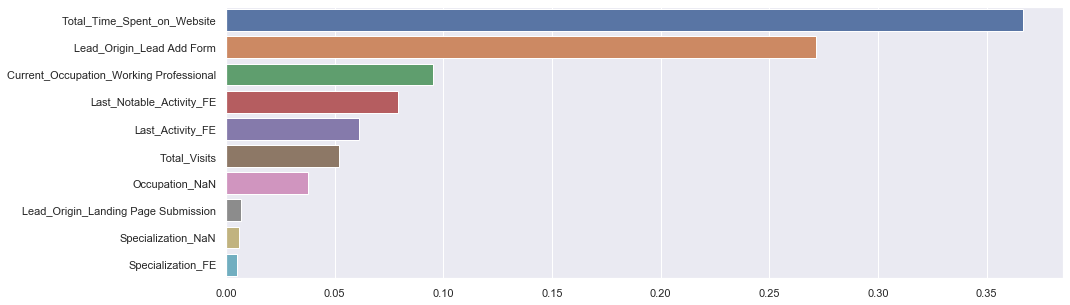

In [83]:
plt.figure(figsize=(15,5))
sns.barplot(y = important_feature.sort_values(ascending = False)[:10].index, x = important_feature.sort_values(ascending = False)[:10].values)


### 2. Random Forest

In [84]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

tree_params_RF = {
                    'n_estimators' : list(range(100,1000,100)),
                    'max_depth' : list(range(2,11,1)),
                    'criterion' : ['gini', 'entropy']
                 }

modelRF = GridSearchCV(clf,param_grid= tree_params_RF,cv=5,verbose=3)
RF = modelRF.fit(X_train,y_train)

Fitting 5 folds for each of 162 candidates, totalling 810 fits
[CV 1/5] END ..criterion=gini, max_depth=2, n_estimators=100; total time=   0.0s
[CV 2/5] END ..criterion=gini, max_depth=2, n_estimators=100; total time=   0.0s
[CV 3/5] END ..criterion=gini, max_depth=2, n_estimators=100; total time=   0.0s
[CV 4/5] END ..criterion=gini, max_depth=2, n_estimators=100; total time=   0.0s
[CV 5/5] END ..criterion=gini, max_depth=2, n_estimators=100; total time=   0.0s
[CV 1/5] END ..criterion=gini, max_depth=2, n_estimators=200; total time=   0.2s
[CV 2/5] END ..criterion=gini, max_depth=2, n_estimators=200; total time=   0.2s
[CV 3/5] END ..criterion=gini, max_depth=2, n_estimators=200; total time=   0.2s
[CV 4/5] END ..criterion=gini, max_depth=2, n_estimators=200; total time=   0.2s
[CV 5/5] END ..criterion=gini, max_depth=2, n_estimators=200; total time=   0.2s
[CV 1/5] END ..criterion=gini, max_depth=2, n_estimators=300; total time=   0.3s
[CV 2/5] END ..criterion=gini, max_depth=2, n_

[CV 2/5] END ..criterion=gini, max_depth=4, n_estimators=300; total time=   0.5s
[CV 3/5] END ..criterion=gini, max_depth=4, n_estimators=300; total time=   0.4s
[CV 4/5] END ..criterion=gini, max_depth=4, n_estimators=300; total time=   0.4s
[CV 5/5] END ..criterion=gini, max_depth=4, n_estimators=300; total time=   0.5s
[CV 1/5] END ..criterion=gini, max_depth=4, n_estimators=400; total time=   0.6s
[CV 2/5] END ..criterion=gini, max_depth=4, n_estimators=400; total time=   0.6s
[CV 3/5] END ..criterion=gini, max_depth=4, n_estimators=400; total time=   0.6s
[CV 4/5] END ..criterion=gini, max_depth=4, n_estimators=400; total time=   0.6s
[CV 5/5] END ..criterion=gini, max_depth=4, n_estimators=400; total time=   0.6s
[CV 1/5] END ..criterion=gini, max_depth=4, n_estimators=500; total time=   0.8s
[CV 2/5] END ..criterion=gini, max_depth=4, n_estimators=500; total time=   0.9s
[CV 3/5] END ..criterion=gini, max_depth=4, n_estimators=500; total time=   0.8s
[CV 4/5] END ..criterion=gin

[CV 4/5] END ..criterion=gini, max_depth=6, n_estimators=500; total time=   1.0s
[CV 5/5] END ..criterion=gini, max_depth=6, n_estimators=500; total time=   1.0s
[CV 1/5] END ..criterion=gini, max_depth=6, n_estimators=600; total time=   1.2s
[CV 2/5] END ..criterion=gini, max_depth=6, n_estimators=600; total time=   1.2s
[CV 3/5] END ..criterion=gini, max_depth=6, n_estimators=600; total time=   1.2s
[CV 4/5] END ..criterion=gini, max_depth=6, n_estimators=600; total time=   1.2s
[CV 5/5] END ..criterion=gini, max_depth=6, n_estimators=600; total time=   1.2s
[CV 1/5] END ..criterion=gini, max_depth=6, n_estimators=700; total time=   1.4s
[CV 2/5] END ..criterion=gini, max_depth=6, n_estimators=700; total time=   1.5s
[CV 3/5] END ..criterion=gini, max_depth=6, n_estimators=700; total time=   1.7s
[CV 4/5] END ..criterion=gini, max_depth=6, n_estimators=700; total time=   1.5s
[CV 5/5] END ..criterion=gini, max_depth=6, n_estimators=700; total time=   1.9s
[CV 1/5] END ..criterion=gin

[CV 1/5] END ..criterion=gini, max_depth=8, n_estimators=800; total time=   2.1s
[CV 2/5] END ..criterion=gini, max_depth=8, n_estimators=800; total time=   2.1s
[CV 3/5] END ..criterion=gini, max_depth=8, n_estimators=800; total time=   2.1s
[CV 4/5] END ..criterion=gini, max_depth=8, n_estimators=800; total time=   2.0s
[CV 5/5] END ..criterion=gini, max_depth=8, n_estimators=800; total time=   2.1s
[CV 1/5] END ..criterion=gini, max_depth=8, n_estimators=900; total time=   2.3s
[CV 2/5] END ..criterion=gini, max_depth=8, n_estimators=900; total time=   2.8s
[CV 3/5] END ..criterion=gini, max_depth=8, n_estimators=900; total time=   2.8s
[CV 4/5] END ..criterion=gini, max_depth=8, n_estimators=900; total time=   2.8s
[CV 5/5] END ..criterion=gini, max_depth=8, n_estimators=900; total time=   2.9s
[CV 1/5] END ..criterion=gini, max_depth=9, n_estimators=100; total time=   0.2s
[CV 2/5] END ..criterion=gini, max_depth=9, n_estimators=100; total time=   0.2s
[CV 3/5] END ..criterion=gin

[CV 4/5] END criterion=entropy, max_depth=2, n_estimators=100; total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=2, n_estimators=100; total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=2, n_estimators=200; total time=   0.2s
[CV 2/5] END criterion=entropy, max_depth=2, n_estimators=200; total time=   0.2s
[CV 3/5] END criterion=entropy, max_depth=2, n_estimators=200; total time=   0.2s
[CV 4/5] END criterion=entropy, max_depth=2, n_estimators=200; total time=   0.2s
[CV 5/5] END criterion=entropy, max_depth=2, n_estimators=200; total time=   0.2s
[CV 1/5] END criterion=entropy, max_depth=2, n_estimators=300; total time=   0.4s
[CV 2/5] END criterion=entropy, max_depth=2, n_estimators=300; total time=   0.4s
[CV 3/5] END criterion=entropy, max_depth=2, n_estimators=300; total time=   0.4s
[CV 4/5] END criterion=entropy, max_depth=2, n_estimators=300; total time=   0.4s
[CV 5/5] END criterion=entropy, max_depth=2, n_estimators=300; total time=   0.4s
[CV 1/5] END cri

[CV 4/5] END criterion=entropy, max_depth=4, n_estimators=300; total time=   0.5s
[CV 5/5] END criterion=entropy, max_depth=4, n_estimators=300; total time=   0.5s
[CV 1/5] END criterion=entropy, max_depth=4, n_estimators=400; total time=   0.7s
[CV 2/5] END criterion=entropy, max_depth=4, n_estimators=400; total time=   0.7s
[CV 3/5] END criterion=entropy, max_depth=4, n_estimators=400; total time=   0.7s
[CV 4/5] END criterion=entropy, max_depth=4, n_estimators=400; total time=   0.7s
[CV 5/5] END criterion=entropy, max_depth=4, n_estimators=400; total time=   0.7s
[CV 1/5] END criterion=entropy, max_depth=4, n_estimators=500; total time=   0.9s
[CV 2/5] END criterion=entropy, max_depth=4, n_estimators=500; total time=   0.9s
[CV 3/5] END criterion=entropy, max_depth=4, n_estimators=500; total time=   0.9s
[CV 4/5] END criterion=entropy, max_depth=4, n_estimators=500; total time=   0.8s
[CV 5/5] END criterion=entropy, max_depth=4, n_estimators=500; total time=   0.9s
[CV 1/5] END cri

[CV 4/5] END criterion=entropy, max_depth=6, n_estimators=500; total time=   1.1s
[CV 5/5] END criterion=entropy, max_depth=6, n_estimators=500; total time=   1.0s
[CV 1/5] END criterion=entropy, max_depth=6, n_estimators=600; total time=   1.3s
[CV 2/5] END criterion=entropy, max_depth=6, n_estimators=600; total time=   1.3s
[CV 3/5] END criterion=entropy, max_depth=6, n_estimators=600; total time=   1.3s
[CV 4/5] END criterion=entropy, max_depth=6, n_estimators=600; total time=   1.3s
[CV 5/5] END criterion=entropy, max_depth=6, n_estimators=600; total time=   1.3s
[CV 1/5] END criterion=entropy, max_depth=6, n_estimators=700; total time=   1.5s
[CV 2/5] END criterion=entropy, max_depth=6, n_estimators=700; total time=   1.5s
[CV 3/5] END criterion=entropy, max_depth=6, n_estimators=700; total time=   1.6s
[CV 4/5] END criterion=entropy, max_depth=6, n_estimators=700; total time=   1.6s
[CV 5/5] END criterion=entropy, max_depth=6, n_estimators=700; total time=   1.7s
[CV 1/5] END cri

[CV 4/5] END criterion=entropy, max_depth=8, n_estimators=700; total time=   2.0s
[CV 5/5] END criterion=entropy, max_depth=8, n_estimators=700; total time=   1.9s
[CV 1/5] END criterion=entropy, max_depth=8, n_estimators=800; total time=   2.1s
[CV 2/5] END criterion=entropy, max_depth=8, n_estimators=800; total time=   2.1s
[CV 3/5] END criterion=entropy, max_depth=8, n_estimators=800; total time=   2.1s
[CV 4/5] END criterion=entropy, max_depth=8, n_estimators=800; total time=   2.2s
[CV 5/5] END criterion=entropy, max_depth=8, n_estimators=800; total time=   2.1s
[CV 1/5] END criterion=entropy, max_depth=8, n_estimators=900; total time=   2.6s
[CV 2/5] END criterion=entropy, max_depth=8, n_estimators=900; total time=   2.4s
[CV 3/5] END criterion=entropy, max_depth=8, n_estimators=900; total time=   2.5s
[CV 4/5] END criterion=entropy, max_depth=8, n_estimators=900; total time=   2.5s
[CV 5/5] END criterion=entropy, max_depth=8, n_estimators=900; total time=   2.5s
[CV 1/5] END cri

[CV 4/5] END criterion=entropy, max_depth=10, n_estimators=900; total time=   2.8s
[CV 5/5] END criterion=entropy, max_depth=10, n_estimators=900; total time=   2.7s


In [85]:
modelRF.best_params_

{'criterion': 'gini', 'max_depth': 9, 'n_estimators': 600}

In [86]:
y_pred_RF = modelRF.predict(X_test)
print(confusion_matrix(y_test, y_pred_RF))
print(classification_report(y_test,y_pred_RF))
print("\n F1 - Score of the model is: ",f1_score(y_test,y_pred_RF))

[[1492  185]
 [ 267  828]]
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1677
           1       0.82      0.76      0.79      1095

    accuracy                           0.84      2772
   macro avg       0.83      0.82      0.83      2772
weighted avg       0.84      0.84      0.84      2772


 F1 - Score of the model is:  0.7855787476280834


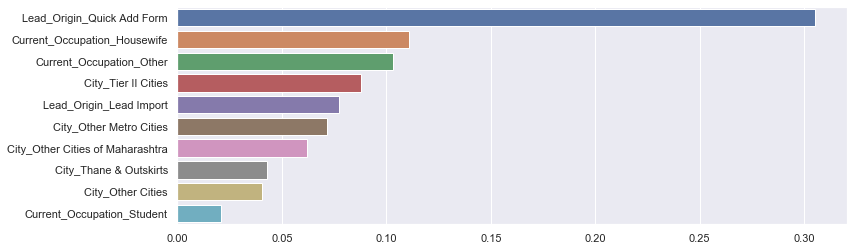

In [87]:
feature_importance_RF = pd.Series(modelRF.best_estimator_.feature_importances_,X_test.columns)
sns.barplot(y=feature_importance_RF.sort_values(ascending = True)[:10].index, x = feature_importance_RF.sort_values(ascending = False)[:10].values)

### 3. Logistic Regression


In [88]:
from sklearn.linear_model import LogisticRegression
LR_Clf = LogisticRegression()

LR_params = {
            'penalty' : ['l2','l1'],
            'C' : [10**-4, 10**-2, 10**0, 2,3,4,10**2,10**4],
            'solver' : ['liblinear']
        
}

modelLR = GridSearchCV(LR_Clf,param_grid= LR_params, verbose=3,cv=5)
LR = modelLR.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END .........C=0.0001, penalty=l2, solver=liblinear; total time=   0.3s
[CV 2/5] END .........C=0.0001, penalty=l2, solver=liblinear; total time=   0.0s
[CV 3/5] END .........C=0.0001, penalty=l2, solver=liblinear; total time=   0.0s
[CV 4/5] END .........C=0.0001, penalty=l2, solver=liblinear; total time=   0.0s
[CV 5/5] END .........C=0.0001, penalty=l2, solver=liblinear; total time=   0.0s
[CV 1/5] END .........C=0.0001, penalty=l1, solver=liblinear; total time=   0.0s
[CV 2/5] END .........C=0.0001, penalty=l1, solver=liblinear; total time=   0.0s
[CV 3/5] END .........C=0.0001, penalty=l1, solver=liblinear; total time=   0.0s
[CV 4/5] END .........C=0.0001, penalty=l1, solver=liblinear; total time=   0.0s
[CV 5/5] END .........C=0.0001, penalty=l1, solver=liblinear; total time=   0.0s
[CV 1/5] END ...........C=0.01, penalty=l2, solver=liblinear; total time=   0.0s
[CV 2/5] END ...........C=0.01, penalty=l2, solv

In [89]:
LR.best_estimator_

LogisticRegression(C=1, penalty='l1', solver='liblinear')

In [219]:
y_pred_LR = LR.predict(X_test)
print(confusion_matrix(y_test,y_pred_LR))
print(classification_report(y_test,y_pred_LR))
print("F1 Score of the model is:", f1_score(y_test,y_pred_LR))

[[1497  180]
 [ 363  732]]
              precision    recall  f1-score   support

           0       0.80      0.89      0.85      1677
           1       0.80      0.67      0.73      1095

    accuracy                           0.80      2772
   macro avg       0.80      0.78      0.79      2772
weighted avg       0.80      0.80      0.80      2772

F1 Score of the model is: 0.7294469357249627
